In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras.datasets import boston_housing

In [4]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [6]:
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(
      loss = 'mse',
      optimizer = 'rmsprop',
      metrics = ['mae']
  )
  return model

In [7]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[: i * num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[: i * num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model()
  model.fit(
      partial_train_data,
      partial_train_targets,
      batch_size = 16,
      epochs = num_epochs,
      verbose = 0
  )
  (val_mse),(val_mae) = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [8]:
print(f"all_scores: {all_scores} | mean: {np.mean(all_scores)}")
print(f"that implies that the house predictions are off by ${np.mean(all_scores)*1000} on average")

all_scores: [1.9907047748565674, 2.611576795578003, 2.538874626159668, 2.43623948097229] | mean: 2.394348919391632
that implies that the house predictions are off by $2394.348919391632 on average


In [9]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [10]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

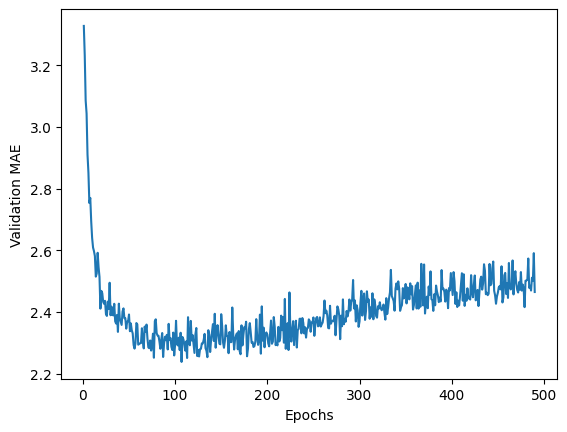

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history[10:]) + 1), average_mae_history[10:])
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [12]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 13.8422 - mae: 2.7619


In [13]:
test_mae_score

2.9462735652923584

In [14]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


array([9.242294], dtype=float32)